# Hyper parameter tunning using Estimation of Distribution Algorithms

This EDA is used when some continuous parameters must be optimized.

In [1]:
from EDAspy.optimization.univariate import EDA_continuous as EDAc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We must define a cost function to optimize. The cost function can be truncated.

For example, in the next defined, the values must be higher than 0. This can also be defined in the vector of statistics define below

In [2]:
# define a cost function
wheights = [20,10,-4]

def cost_function(dictionary):
    """
    dictionary: python dictionary object with name of parameter as key, and value of the parameter as value
    return: total cost associated to the combination of parameters
    """
    function = wheights[0]*dictionary['param1']**2 + wheights[1]*(np.pi/dictionary['param2']) - 2 - wheights[2]*dictionary['param3']
    if function < 0:
        return 9999999
    return function

The vector of statistics define the starting values to start searching. We can define an initial mean and desviation. We can also define a maximum an minimum value for the hyper parameters. This can be defined in the cost function or in the vector of statistics.

If not desired to define the minimum and maximum, just delete the rows in pandas dataframe

In [3]:
# initial vector of statistics
vector = pd.DataFrame(columns=['param1', 'param2', 'param3'])
vector['data'] = ['mu', 'std', 'min', 'max']
vector = vector.set_index('data')
vector.loc['mu'] = [5, 8, 1]
vector.loc['std'] = 20

vector.loc['min'] = 0  # optional
vector.loc['max'] = 100  # optional
vector

,param1,param2,param3
data,,,
mu,5,8,1
std,20,20,20
min,0,0,0
max,100,100,100


Execute the algorithm. We must define:
1. Number of individuals in each generation
2. Maximum number of iterations
3. Number of iterations after which, if the cost is not improved, the algorithm finishes
4. Percentage (over 1) of the population to be selected to mutate
5. vector of statistics
6. Aim: 'minimize' or 'maximize'
7. The cost function to optimize

The algorithm returns the best cost, a pandas dataframe with the solution found, and the history of costs

In [7]:
EDA = EDAc(SIZE_GEN=40, MAX_ITER=200, DEAD_ITER=20, ALPHA=0.7, vector=vector, 
            aim='minimize', cost_function=cost_function)
bestcost, params, history = EDA.run()

IT  0 best cost  6.5514902308251735
IT  1 best cost  2.7751156546649898
IT  2 best cost  5.211704315648551
IT  3 best cost  2.1473882152934958
IT  4 best cost  2.9154773764244224
IT  5 best cost  3.3248207075426968
IT  6 best cost  2.2037306095671916
IT  7 best cost  3.9618949527786755
IT  8 best cost  1.9508915392440174
IT  9 best cost  2.235997023671448
IT  10 best cost  3.342263741120374
IT  11 best cost  2.3593262814812963
IT  12 best cost  2.752510278273155
IT  13 best cost  2.828326791107806
IT  14 best cost  4.067061314368048
IT  15 best cost  1.7893173595437855
IT  16 best cost  3.6011884611843548
IT  17 best cost  4.879689027299914
IT  18 best cost  3.976479584727825
IT  19 best cost  7.716803871602065
IT  20 best cost  5.08283518794845
IT  21 best cost  6.403971072493544
IT  22 best cost  5.663993789414669
IT  23 best cost  2.811296552244172
IT  24 best cost  6.1175795449734816
IT  25 best cost  9.952117869618347
IT  26 best cost  9.70353673164842
IT  27 best cost  12.2953845

In [8]:
print('Best cost found:', bestcost)
print('Best solution:\n', params)

Best cost found: 1.7893173595437855
Best solution:
     param1    param2    param3      cost
0  0.01271  9.115591  0.084923  1.789317


# Some plots

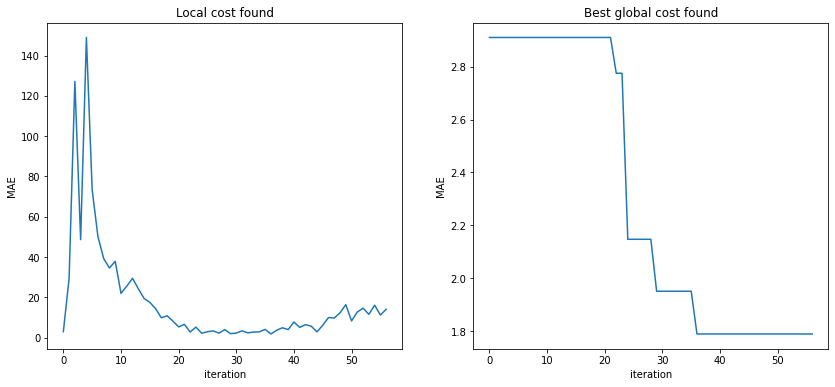

In [9]:
relative_plot = []
mx = 999999999
for i in range(len(history)):
    if history[i] < mx:
        mx = history[i]
        relative_plot.append(mx)
    else:
        relative_plot.append(mx)

plt.figure(figsize = (14,6))

ax = plt.subplot(121)
ax.plot(list(range(len(history))), history)
ax.title.set_text('Local cost found')
ax.set_xlabel('iteration')
ax.set_ylabel('MAE')

ax = plt.subplot(122)
ax.plot(list(range(len(relative_plot))), relative_plot)
ax.title.set_text('Best global cost found')
ax.set_xlabel('iteration')
ax.set_ylabel('MAE')

plt.show()